Vista previa de los datos después de corregir la estructura:
         Date Store     Category Units_Sold Unit_Price
0  2024-01-01   101  Electronics         30     299.99
1  2024-01-01   102     Clothing         45      49.99
2  2024-01-01   103   Home Goods         20      19.99
3  2024-01-02   101  Electronics         25     299.99
4  2024-01-02   102     Clothing         50      49.99

Información de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        110 non-null    object
 1   Store       110 non-null    object
 2   Category    110 non-null    object
 3   Units_Sold  110 non-null    object
 4   Unit_Price  110 non-null    object
dtypes: object(5)
memory usage: 4.4+ KB
None

Estadísticas descriptivas:
              Date Store    Category Units_Sold Unit_Price
count          110   110         110        110        110
uniq

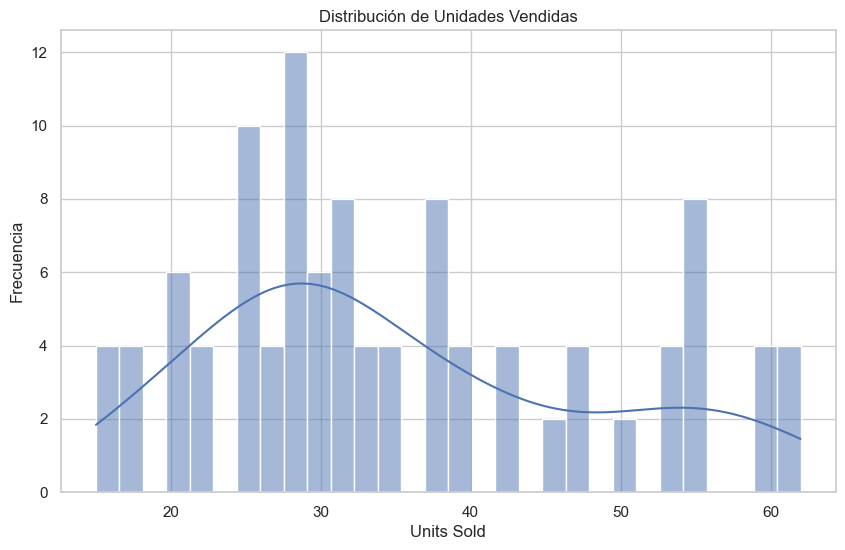

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Ruta al archivo CSV (con la extensión corregida)
file_path = "../data/sales_data.csv"  # Cambia la extensión a .csv

# Cargar los datos
try:
    # Cargar el archivo CSV con el parámetro 'quotechar' para manejar comas dentro de comillas
    data = pd.read_csv(file_path, delimiter=",", encoding="latin1", quotechar='"', engine="python")
    
    # Si las columnas aún están unidas, separar manualmente
    if len(data.columns) == 1:
        data = data.iloc[:, 0].str.split(",", expand=True)
        data.columns = ["Date", "Store", "Category", "Units_Sold", "Unit_Price"]

    print("Vista previa de los datos después de corregir la estructura:")
    print(data.head())

    # Información básica de los datos
    print("\nInformación de las columnas:")
    print(data.info())

    # Estadísticas descriptivas
    print("\nEstadísticas descriptivas:")
    print(data.describe())

    # Identificar valores nulos
    print("\nValores nulos por columna:")
    print(data.isnull().sum())

    # Identificar duplicados
    print(f"\nNúmero de filas duplicadas: {data.duplicated().sum()}")

    # Visualización preliminar: Distribución de Units_Sold
    if "Units_Sold" in data.columns:
        data["Units_Sold"] = pd.to_numeric(data["Units_Sold"], errors="coerce")  # Convertir a numérico
        sns.histplot(data["Units_Sold"], kde=True, bins=30)
        plt.title("Distribución de Unidades Vendidas")
        plt.xlabel("Units Sold")
        plt.ylabel("Frecuencia")
        plt.show()
    else:
        print("La columna 'Units_Sold' no se encuentra en los datos.")

except Exception as e:
    print(f"Error al procesar el archivo: {e}")
